<a href="https://colab.research.google.com/github/imancivil/Titanic-Dashboard/blob/master/Titanic_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
    <h1 align="center">Titanic Dataset</h1>
    <h3 align="center">Building Interactive Web Applications for the Titanic Dataset</h3>
    <h4 align="center"><a href="https://www.linkedin.com/in/iman-mansouri-76647a45/">Iman Mansouri</a></h5>
</div>

**Import Modules**

In [18]:
# Install required libraries
!pip install scikit-learn xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# Import necessary libraries and modules

# Pandas is used for data manipulation and analysis
import pandas as pd

# The 're' module provides support for regular expressions (regex)
import re

# NumPy is used for numerical operations on arrays and matrices
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# sklearn.preprocessing provides functions for preprocessing input data
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# sklearn.impute provides functions for handling missing values
from sklearn.impute import SimpleImputer

# sklearn.pipeline provides a pipeline for building and executing a sequence of data processing steps
from sklearn.pipeline import Pipeline

# sklearn.compose provides tools for combining transformers and estimators
from sklearn.compose import ColumnTransformer, make_column_transformer

# sklearn.base provides base classes for creating custom estimators and transformers
from sklearn.base import BaseEstimator, TransformerMixin

# XGBoost is a gradient boosting library for classification and regression tasks
from xgboost import XGBClassifier

# sklearn.model_selection provides functions for splitting datasets and performing cross-validation
from sklearn.model_selection import train_test_split

# sklearn.metrics provides functions for model evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# The warnings module is used to suppress any warning messages
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [11]:
# Load the dataset
df = pd.read_csv('train.csv')

# Separate the features (X) and the target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

**Exploratory Data Analysis**

In [12]:
# Display the first few rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [16]:
# Summary statistics of the DataFrame
# .round(2): Round the values to two decimal places
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


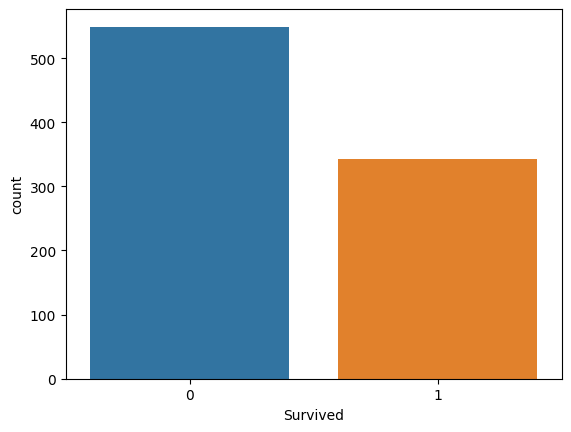

In [22]:
# # Create a countplot using seaborn
sns.countplot(x='Survived', data=df);

The count plot helps us understand the distribution of the 'Survived' variable

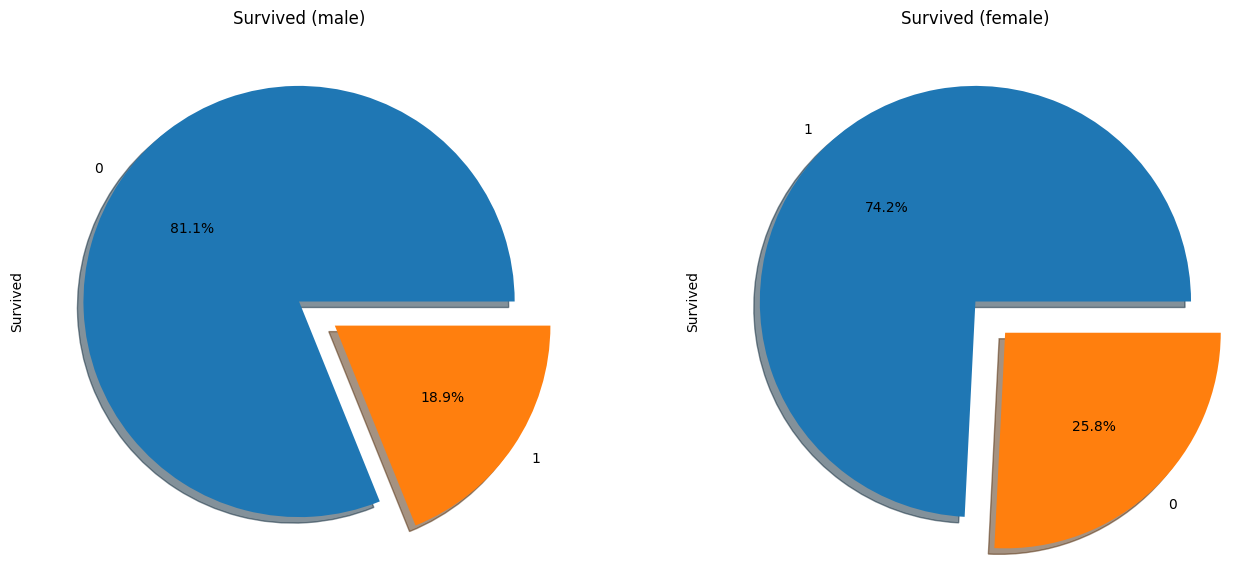

In [23]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns, with a figure size of 16x7 inches
f, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot the pie chart for survival counts of males
df['Survived'][df['Sex'] == 'male'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.1f%%', ax=ax[0], shadow=True)

# Plot the pie chart for survival counts of females
df['Survived'][df['Sex'] == 'female'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.1f%%', ax=ax[1], shadow=True)

# Set the title for the first subplot
ax[0].set_title('Survived (male)')

# Set the title for the second subplot
ax[1].set_title('Survived (female)')

# Display the plot
plt.show()

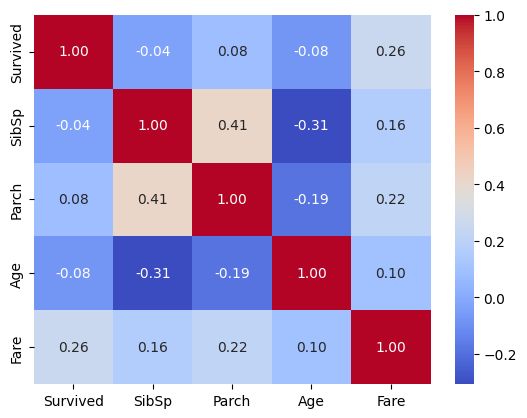

In [24]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
import seaborn as sns
%matplotlib inline
g = sns.heatmap(df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Only Fare feature seems to have a significative correlation with the survival probability.

It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

In [26]:
# The presence of the BaseEstimator class ensures that the transformer has the necessary get_params and set_params methods as required by all scikit-learn estimators.
# The TransformerMixin class provides the fit_transform method to the transformer.

# Define a custom transformer class for data preprocessing
class PrepProcesor(BaseEstimator, TransformerMixin): 
    def fit(self, X, y=None): 
        # Initialize and fit the age imputer
        self.ageImputer = SimpleImputer()
        self.ageImputer.fit(X[['Age']])        
        return self 
        
    def transform(self, X, y=None):
        # Impute missing values in 'Age' column
        X['Age'] = self.ageImputer.transform(X[['Age']])
        
        # Preprocess 'Cabin' column to extract cabin class and number
        
        X['CabinClass'] = X['Cabin'].fillna('M').apply(lambda x: str(x).replace(" ", "")).apply(lambda x: re.sub(r'[^a-zA-Z]', '', x))
        X['CabinNumber'] = X['Cabin'].fillna('M').apply(lambda x: str(x).replace(" ", "")).apply(lambda x: re.sub(r'[^0-9]', '', x)).replace('', 0) 
        
        # Fill missing values in 'Embarked' column
        X['Embarked'] = X['Embarked'].fillna('M')
        
        # Drop unnecessary columns
        X = X.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1)
        
        return X

**X['Cabin'].fillna('M')** fills the missing values in the 'Cabin' column with the string 'M' using the fillna() function. This ensures that there are no missing values in the column.

**.apply(lambda x: str(x).replace(" ", ""))** applies a lambda function to each element of the 'Cabin' column. The lambda function lambda x: str(x).replace(" ", "") converts each element to a string (str(x)) and removes any spaces within the string (replace(" ", "")). This is done to eliminate any spaces within the cabin values.

**.apply(lambda x: re.sub(r'[^a-zA-Z]', '', x))** applies another lambda function to each element of the 'Cabin' column. This lambda function uses the re.sub() function from the 're' module to perform a regular expression substitution. It removes any characters that are not alphabetic **([^a-zA-Z]) **from the cabin values. This step is done to extract only the alphabetic characters from the cabin values.

Finally, the resulting cleaned values are assigned to a new column 'CabinClass' in the DataFrame X.

In general, the lambda functions provide a concise way to apply specific operations to each element of a column in the DataFrame. In this case, they are used for cleaning and transforming the 'Cabin' values in X.

**.apply(lambda x: re.sub(r'[^0-9]', '', x))** applies another lambda function to each element of the 'Cabin' column. The lambda function uses the re.sub() function from the 're' module to perform a regular expression substitution. It removes any non-digit characters ([^0-9]) from the cabin values, essentially keeping only the digits. This step is done to extract only the numeric part of the cabin values.

**.replace('', 0)** replaces any empty strings with the value 0. This is done to handle the case where a cabin value contains only non-numeric characters and is transformed to an empty string after removing non-digit characters. By replacing the empty strings with 0, it assigns a default value for such cases.

Finally, the resulting transformed values are assigned to a new column 'CabinNumber' in the DataFrame X.

In [27]:
# Instantiate a PrepProcesor object
preproc = PrepProcesor()  

# Define a numeric pipeline with a StandardScaler
numeric_pipeline = Pipeline([
    ('Scaler', StandardScaler())
])

# Define a categorical pipeline with OneHotEncoder
categorical_pipeline = Pipeline([
    ('OneHot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a transformer using ColumnTransformer
# The transformer applies the numeric pipeline to the columns ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'CabinNumber']
# and the categorical pipeline to the columns ['Sex', 'Embarked', 'CabinClass']
transformer = ColumnTransformer([
    ('num', numeric_pipeline, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'CabinNumber']),
    ('cat', categorical_pipeline, ['Sex', 'Embarked', 'CabinClass'])
])

In [47]:
# Split the data into training and testing sets

# The test set size is 20% of the entire dataset
# The random_state is set to 1234 to ensure reproducibility of the split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

In [48]:
# Print training features
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
125,126,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
631,632,3,"Lundahl, Mr. Johan Svensson",male,51.00,0,0,347743,7.0542,NaN,S
643,644,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
808,809,2,"Meyer, Mr. August",male,39.00,0,0,248723,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
204,205,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S
53,54,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.00,1,0,2926,26.0000,NaN,S
294,295,3,"Mineff, Mr. Ivan",male,24.00,0,0,349233,7.8958,NaN,S
723,724,2,"Hodges, Mr. Henry Price",male,50.00,0,0,250643,13.0000,NaN,S


In [49]:
# Create a machine learning pipeline
# The pipeline consists of three steps:
#   1. InitialPreproc: PrepProcesor() is used to perform initial preprocessing
#   2. Transformer: The previously defined transformer is applied to further transform the data
#   3. xgb: XGBClassifier() is used as the final estimator in the pipeline
mlpipe = Pipeline([
    ('InitialPreproc', PrepProcesor()),
    ('Transformer', transformer),
    ('xgb', XGBClassifier())
])

In [50]:
# Fit the machine learning pipeline to the training data

mlpipe.fit(X_train, y_train)

Pipeline(steps=[('InitialPreproc', PrepProcesor()),
                ('Transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare',
                                                   'CabinNumber']),
                                                 ('cat',
                                                  Pipeline(steps=[('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'CabinClass'])])),
                ('xgb',
                 XGBClassifier(base_score=No...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [51]:
# Use the trained machine learning pipeline to predict labels for the test data

y_hat = mlpipe.predict(X_test)

In [52]:
# Retrieve the shape of the predicted labels
# y_hat.shape: Shape of the predicted labels array
y_hat.shape

(179,)

In [53]:
 # Print variable representing the true labels for the test data
y_test 

523    1
778    0
760    0
496    1
583    0
      ..
100    0
773    0
222    0
495    0
99     0
Name: Survived, Length: 179, dtype: int64

In [54]:
# Calculate the precision score between the true labels (y_test) and predicted labels (y_hat)
precision_score(y_test, y_hat)

0.7714285714285715

In [55]:
# Import the joblib module for saving and loading models
import joblib

In [56]:
# Save the trained machine learning pipeline to a joblib file
# mlpipe: Trained machine learning pipeline
# 'xgbpipe.joblib': File path where the pipeline will be saved
joblib.dump(mlpipe, 'xgbpipe.joblib')

['xgbpipe.joblib']

In [57]:
# Load the trained machine learning pipeline from a joblib file
# 'xgbpipe.joblib': File path from where the pipeline will be loaded
# model: Loaded machine learning pipeline
model = joblib.load('xgbpipe.joblib')

In [58]:

# Read the test data from a CSV file into a pandas DataFrame
test = pd.read_csv('test.csv')

In [59]:
# Retrieve the column names of the test data
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [60]:
# Use the trained machine learning pipeline to predict labels for the test data
# test: Testing features
# yhat: Predicted labels
yhat = mlpipe.predict(test)
yhat

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
 # pip freeze > requirements.txt

**Conclusion**

In this notebook, I explored the Titanic dataset, aiming to predict passenger survival based on various features. My analysis using XGBoost resulted in a precision score of 0.77, which suggests a reasonable ability to predict survival accurately. However, there is room for further investigation and improvement. Future work may involve exploring alternative models, addressing data imbalance, and incorporating additional features to enhance the predictive performance.